# Dependencies loading

In [32]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

np.random.seed(2024)
pd.set_option("display.max_columns", 500)

# Data loading

In [33]:
data = pd.read_csv('../input_data/X_train.csv',index_col=0)
data_test = pd.read_csv('../input_data/X_test.csv', index_col=0)
y_train = pd.read_csv('../input_data/y_train.csv',index_col=0)

In [34]:
data.shape

(8101, 21)

In [35]:
data.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
0,27.0,0.0,3.0,2.0,0.0,36.0,5.0,1.0,0.0,13439.0,2003.0,11436.0,0.936,4715.0,86.0,0.720,0.149,0.0,1.0,Married,M
1,46.0,0.0,0.0,2.0,1.0,36.0,6.0,3.0,2.0,30501.0,2030.0,28471.0,0.560,2525.0,45.0,0.500,0.067,0.0,0.0,Single,F
2,46.0,2.0,1.0,0.0,0.0,37.0,3.0,1.0,1.0,6118.0,1092.0,5026.0,0.757,4434.0,81.0,0.620,0.178,0.0,0.0,Married,M
3,57.0,2.0,3.0,0.0,0.0,45.0,6.0,2.0,2.0,1438.3,740.0,698.3,0.698,4970.0,87.0,0.933,0.514,0.0,0.0,Married,F
4,56.0,1.0,2.0,3.0,0.0,36.0,3.0,3.0,3.0,34516.0,1477.0,33039.0,1.234,2395.0,50.0,0.724,0.043,0.0,0.0,Married,M


In [36]:
data_test.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
0,56.0,2.0,0.0,0.0,0.0,42.0,4.0,2.0,2.0,3495.0,1427.0,2068.0,0.563,4466.0,85.0,0.889,0.408,0.0,0.0,NaN,NaN
1,47.0,4.0,2.0,1.0,0.0,35.0,6.0,1.0,2.0,3560.0,751.0,2809.0,1.096,4060.0,79.0,0.975,0.211,0.0,0.0,NaN,NaN
2,42.0,2.0,0.0,2.0,0.0,32.0,5.0,5.0,3.0,4708.0,0.0,4708.0,0.718,4597.0,89.0,0.679,0.000,0.0,1.0,NaN,NaN
3,45.0,4.0,3.0,0.0,0.0,38.0,2.0,2.0,1.0,2396.0,887.0,1509.0,0.604,7480.0,84.0,0.787,0.370,0.0,0.0,NaN,NaN
4,51.0,3.0,3.0,0.0,0.0,30.0,3.0,2.0,0.0,6006.0,1576.0,4430.0,0.504,3199.0,65.0,0.548,0.262,1.0,0.0,NaN,NaN


# Feature engineering

## One dimensional

### Categorical variables

We converted the categorical variables—Income_Category, Education_Level, and Card_Category—into ordinal numerical values. This transformation was driven by the significance of order and hierarchy within these variables. 

Now we are left with Gender and Marital Status, in this case we will perform one-hot encoding. We are going to drop first category to ommit collinearity issue.

#### Gender

In [37]:
data = pd.get_dummies(data, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

In [38]:
data_test = pd.get_dummies(data_test, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

#### Marital status

In [39]:
data = pd.get_dummies(data, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

In [40]:
data_test = pd.get_dummies(data_test, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

Since we've got a bunch of variables with money values in our dataset, doing a log transformation could be a good move. It's a handy trick to tone down the variability in these cases.

### Total transaction amount

Total transaction amount as seen earlier follows wired distribution. 

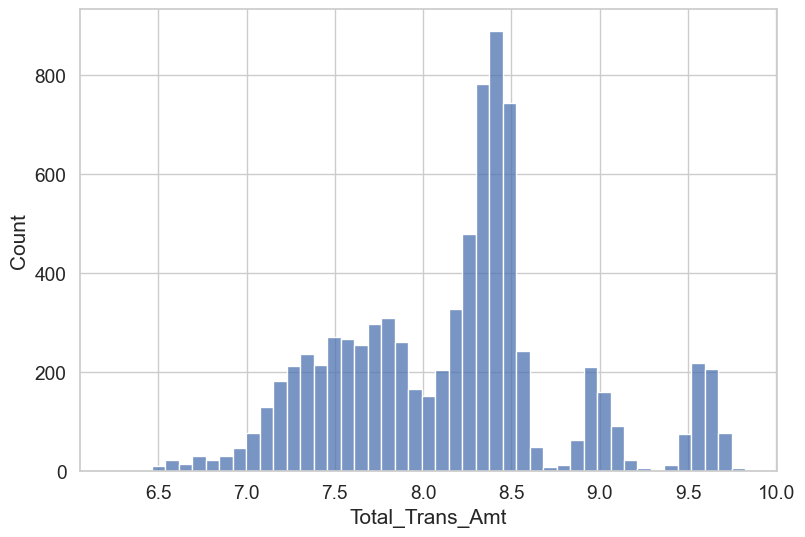

In [41]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']))
plt.show()

In [42]:
data['ln_Total_Trans_Amt'] = np.log(data['Total_Trans_Amt'])
data_test['ln_Total_Trans_Amt'] = np.log(data_test['Total_Trans_Amt'])

The application of logarithm transformation could be beneficial in our analysis by potentially reducing variance.

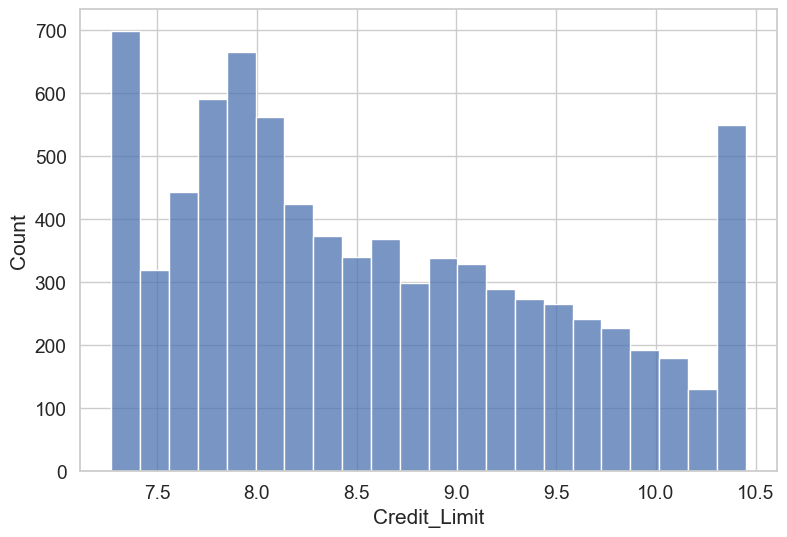

In [43]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Credit_Limit']))
plt.show()

In [44]:
data['ln_Credit_Limit'] = np.log(data['Credit_Limit'])
data_test['ln_Credit_Limit'] = np.log(data_test['Credit_Limit'])

## Multi dimensional

### Average transaction

It may be worth to include into our analysis transformation of Total_Trans_Amt and Total_Trans_Ct

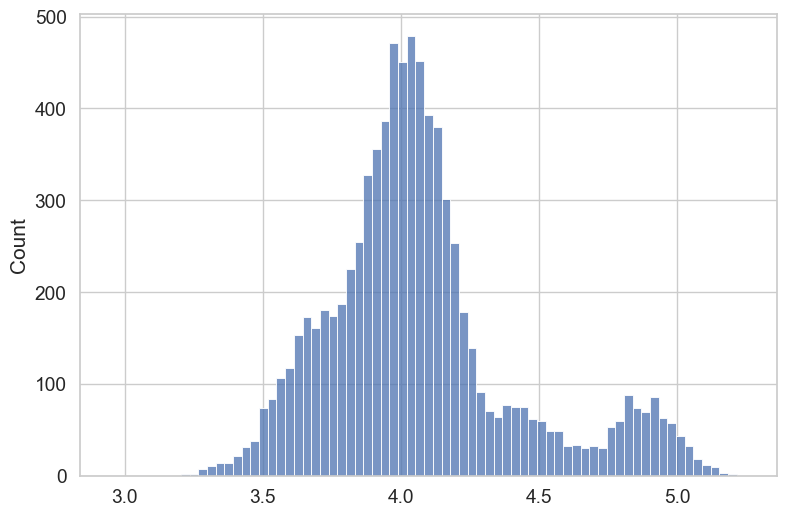

In [45]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']/data['Total_Trans_Ct']))
plt.show()

In [46]:
data["ln_Avg_Transaction"] = np.log(data['Total_Trans_Amt']/data['Total_Trans_Ct'])
data_test["ln_Avg_Transaction"] = np.log(data_test['Total_Trans_Amt']/data_test['Total_Trans_Ct'])

### Account utilization

Additional interesting insight may be use of account calculated as total revolving balance / credit limit

While the card utilization rate is already part of our dataset, this additional feature has the potential to offer supplementary insights into the financial behavior and management of customer accounts. 

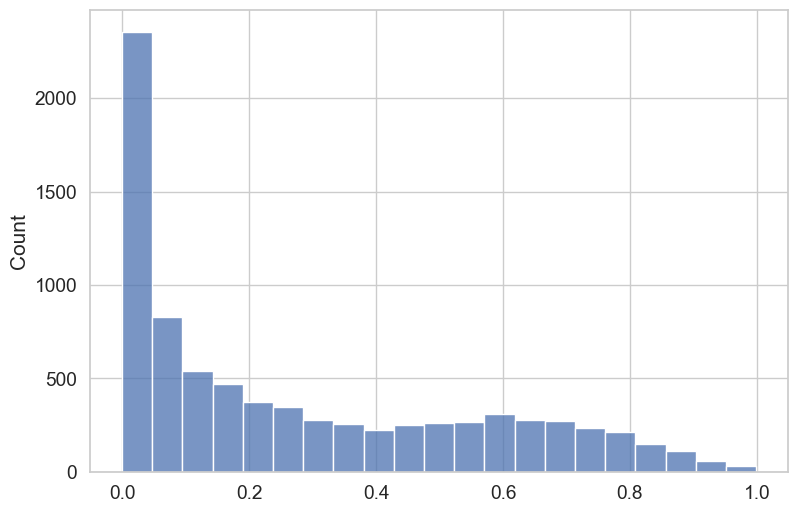

In [47]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data['Total_Revolving_Bal']/data['Credit_Limit'])
plt.show()

In [48]:
data["Credit_utilization"] = data['Total_Revolving_Bal']/data['Credit_Limit']
data_test["Credit_utilization"] = data['Total_Revolving_Bal']/data['Credit_Limit']

# Feature Selection

Now after performing feature engineering we have more variables. Some of them will be highly correlated which may introduce multicolinearity to our models. In order to choose variables with highest predicting power we will need to conduct feature selection.

## Correlation

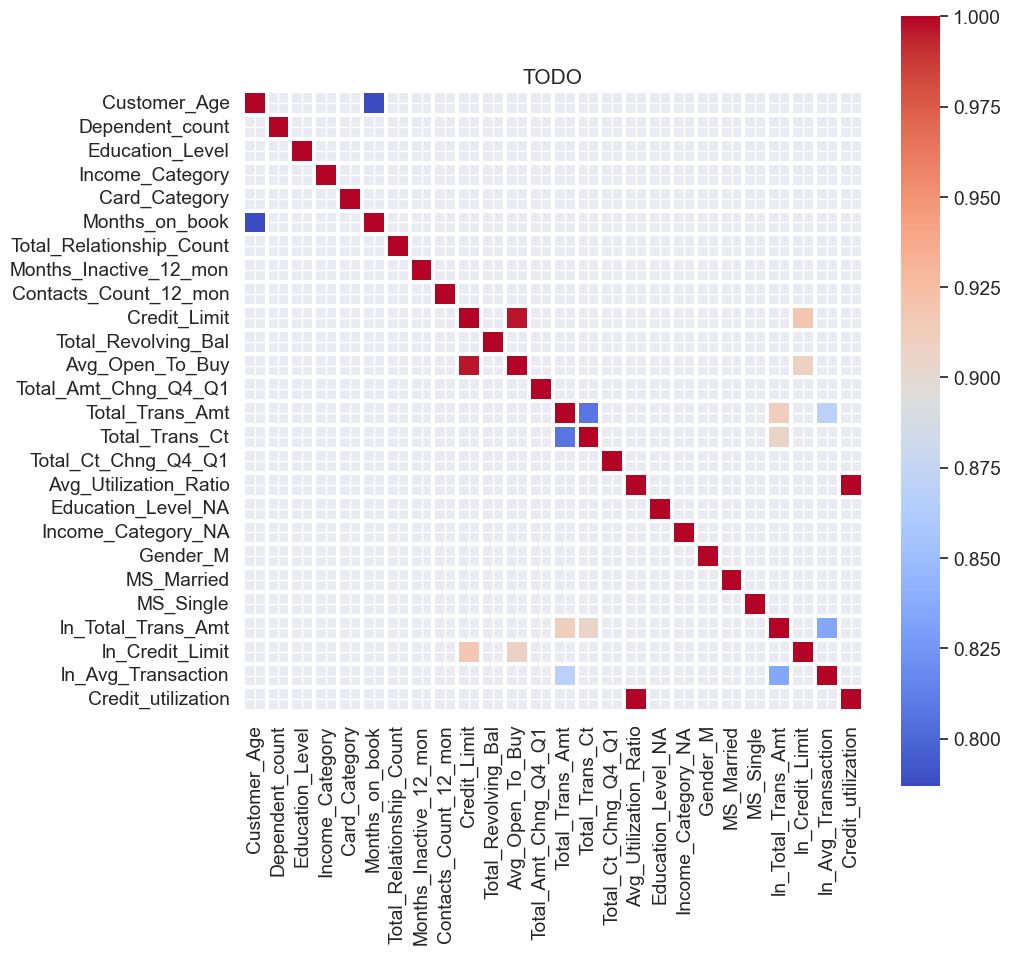

In [49]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    data.corr()[(abs(data.corr())>0.7)],
    linewidths=1.5, annot=False, square=True, fmt=".2f", annot_kws={"size": 10},
    cmap = 'coolwarm'
)
plt.title("TODO")
plt.show()

In [50]:
data.corr()[(abs(data.corr())>0.7)].fillna("")

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Credit_utilization
Customer_Age,1.0,,,,,0.786791,,,,,,,,,,,,,,,,,,,,
Dependent_count,,1.0,,,,,,,,,,,,,,,,,,,,,,,,
Education_Level,,,1.0,,,,,,,,,,,,,,,,,,,,,,,
Income_Category,,,,1.0,,,,,,,,,,,,,,,,,,,,,,
Card_Category,,,,,1.0,,,,,,,,,,,,,,,,,,,,,
Months_on_book,0.786791,,,,,1.0,,,,,,,,,,,,,,,,,,,,
Total_Relationship_Count,,,,,,,1.0,,,,,,,,,,,,,,,,,,,
Months_Inactive_12_mon,,,,,,,,1.0,,,,,,,,,,,,,,,,,,
Contacts_Count_12_mon,,,,,,,,,1.0,,,,,,,,,,,,,,,,,
Credit_Limit,,,,,,,,,,1.0,,0.995995,,,,,,,,,,,,0.917895,,


As we can see now we have more variables with high correlation, mainly due to the fact that we created transformation of already existing variables.

## Variance Threshold

In [51]:
FE_columns = pd.DataFrame(data.var()).reset_index().rename(columns={'index':'Variable',0:"Variance"}).round(2)

Instead of using variance threshold we will be keeping variance value for further analysis.

It is also worth mentioning that some of our variables are expressed as percentage, logarithms, or monetray values. The variance threshold method, which is commonly used in feature selection, may need to be adapted to account for these diverse scales and units. 

## Chi2

In Chi2 test our hypothesis are:

(H0): Two variables are independent.

(H1): Two variables are not independent. 

Our objective is to establish a significant association, particularly desiring a "low" p-value. A low p-value suggests that the observed association between the variables is unlikely to have occurred by random chance.

We also must remember that chi2 test works with two nominal/ordinal categorical variables

In [52]:
from sklearn.feature_selection import chi2

In [53]:
FE_columns['Chi2'] = chi2(data,y_train)[0].round(3)

In [54]:
FE_columns['p_Chi2'] = chi2(data,y_train)[1].round(3)

## ANOVA-f Statistic

This statistic is more suitable in case when we have categorical and numerical variable. However, it's important to note a drawback: the test assumes a normal distribution, a condition that is not guaranteed in our specific case.

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(data, y_train)

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all')

In [56]:
FE_columns["F_S"] = fs.scores_.round(3)

## Mutual Information

In [57]:
from sklearn.feature_selection import mutual_info_classif
mi = SelectKBest(score_func=mutual_info_classif, k='all')
mi.fit(data, y_train)

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all', score_func=<function mutual_info_classif at 0x2a969db80>)

In [58]:
FE_columns['M_I'] = mi.scores_.round(3)

In [59]:
FE_columns

,Variable,Variance,Chi2,p_Chi2,F_S,M_I
0,Customer_Age,64.11,2.705,0.100,1.958,0.004
1,Dependent_count,1.69,2.431,0.119,3.373,0.000
2,Education_Level,1.83,5.758,0.016,6.524,0.000
3,Income_Category,1.78,0.985,0.321,0.757,0.000
4,Card_Category,0.11,0.004,0.949,0.003,0.000
5,Months_on_book,63.90,1.552,0.213,0.874,0.006
6,Total_Relationship_Count,2.43,107.034,0.000,171.491,0.007
7,Months_Inactive_12_mon,1.02,83.554,0.000,195.501,0.022
8,Contacts_Count_12_mon,1.23,180.411,0.000,377.836,0.028
9,Credit_Limit,83066683.46,23895.053,0.000,2.487,0.002


## Elastic Net

Now we will be working with feature selection method that considers the relationship among multiple features, rather than focusing solely on the target variable and a single feature.

Source: https://www.kaggle.com/code/cast42/feature-selection-and-elastic-net/notebook

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from itertools import product

In [61]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, data, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [0.2, 0.1, 1, 0.9, 0.8, 0.7, 0.5]

In [62]:
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio, random_state = 2024)).mean()
            for (alpha, l1_ratio) in product(alphas, l1_ratios)]

KeyboardInterrupt: 

In [ ]:
idx = list(product(alphas, l1_ratios))[:10]
p_cv_elastic = pd.Series(cv_elastic[:10], index = idx)

<Axes: >

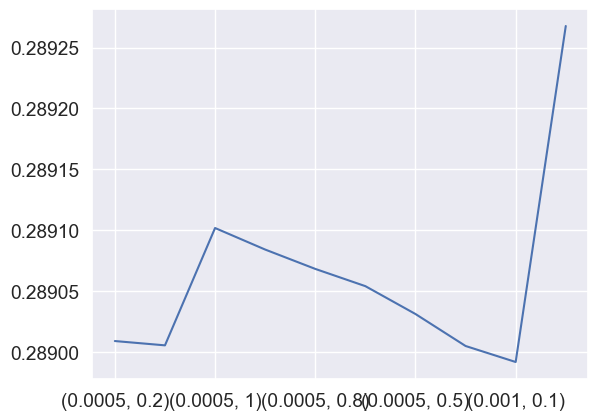

In [ ]:
p_cv_elastic.plot()

We can see min RMSE at alpha = 0.001 and l1_ratio = 0.1

In [ ]:
EN = ElasticNet(alpha=0.001, l1_ratio=0.1,random_state=2024)

In [ ]:
EN.fit(data,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=2024)

In [ ]:
FE_columns["EN_coef"] = EN.coef_

# Feature Selection Summary

In [ ]:
FE_columns

,Variable,Variance,Chi2,p_Chi2,F_S,M_I,EN_coef
0,Customer_Age,64.11,2.705,0.100,1.958,0.004,-2.387532e-04
1,Dependent_count,1.69,2.431,0.119,3.373,0.000,1.009164e-02
2,Education_Level,1.83,5.758,0.016,6.524,0.000,3.303844e-03
3,Income_Category,1.78,0.985,0.321,0.757,0.000,-5.787566e-03
4,Card_Category,0.11,0.004,0.949,0.003,0.000,1.808591e-02
5,Months_on_book,63.90,1.552,0.213,0.874,0.006,-4.020327e-04
6,Total_Relationship_Count,2.43,107.034,0.000,171.491,0.007,-4.003024e-02
7,Months_Inactive_12_mon,1.02,83.554,0.000,195.501,0.022,3.944177e-02
8,Contacts_Count_12_mon,1.23,180.411,0.000,377.836,0.028,4.368884e-02
9,Credit_Limit,83066683.46,23895.053,0.000,2.487,0.002,2.255557e-06


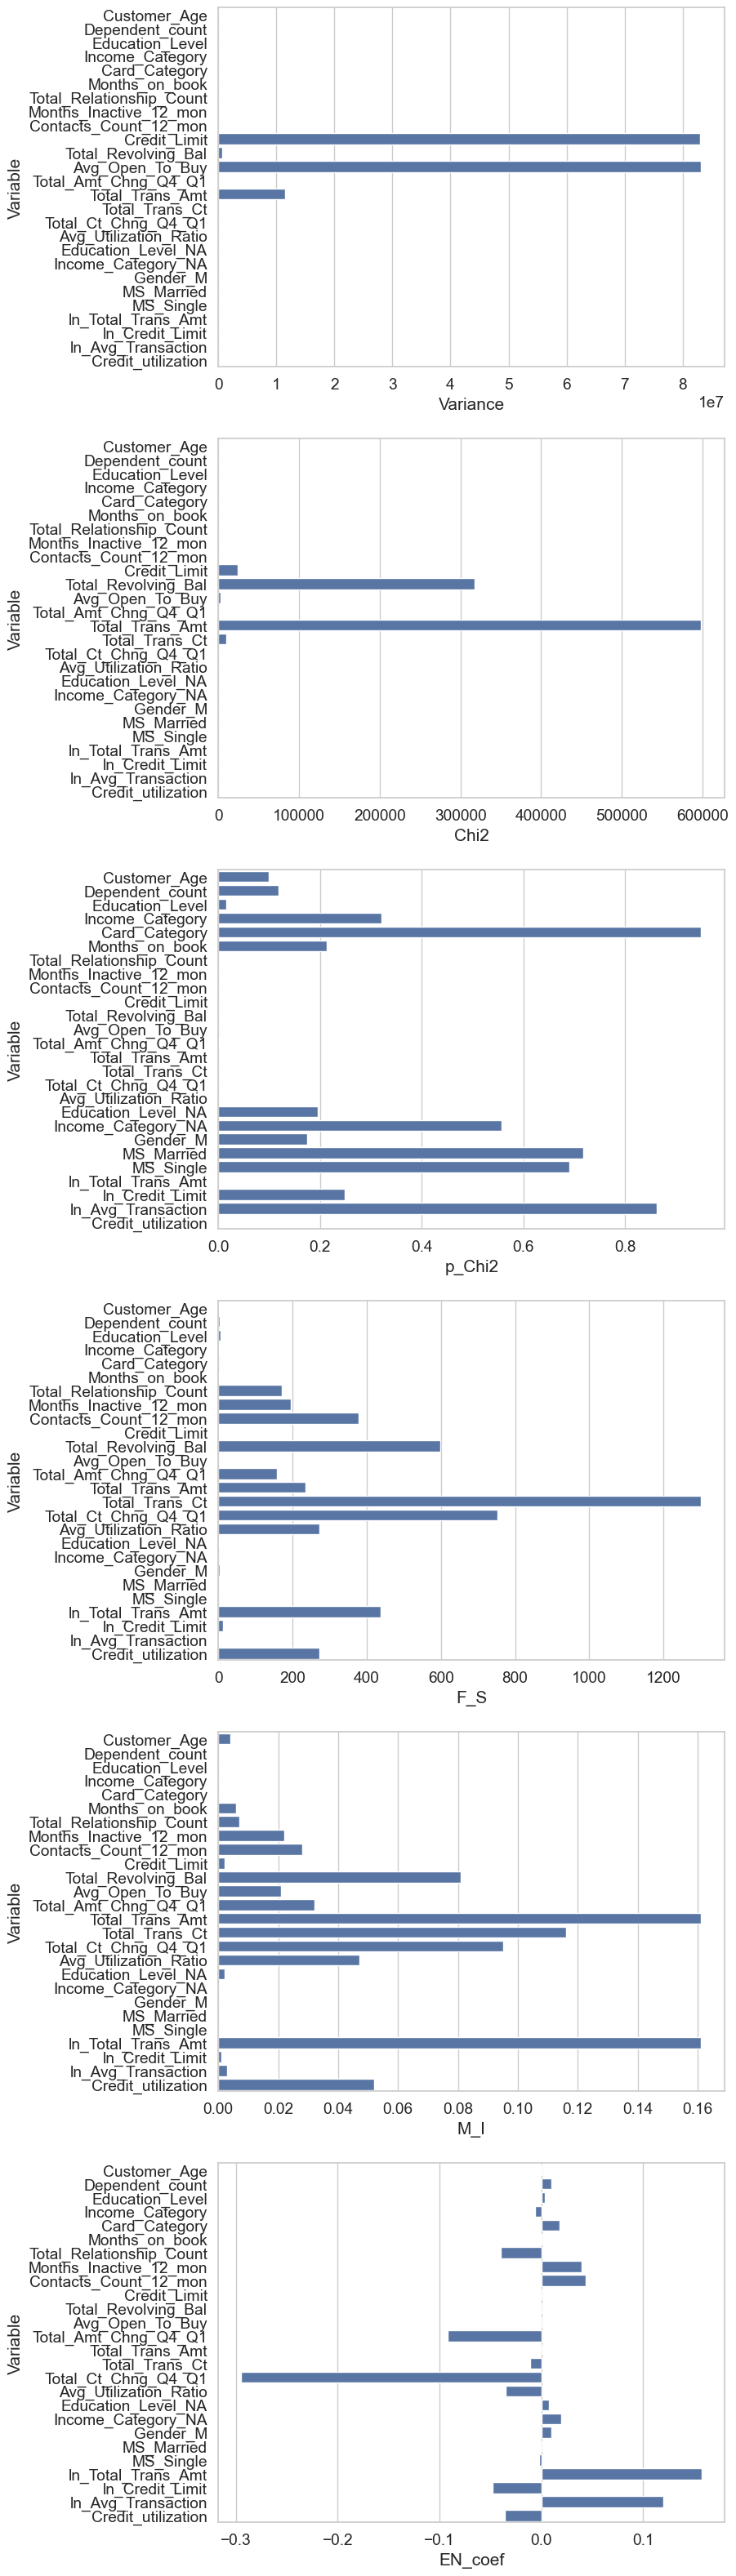

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(FE_columns.shape[1]-1, 1, figsize=(8, 40))
for i,col in enumerate(FE_columns.columns[1:]):
    sns.barplot(FE_columns,y = "Variable",x=str(col),ax = axs[i])
plt.show()

# SMOTE 

As we can remember from earlier parts - our target variable Attrition_Flag has imbalanced distribution. To address this imbalance, we will employ Synthetic Minority Over-sampling Technique (SMOTE). 

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2024)

In [64]:
data_res, y_res = sm.fit_resample(data, y_train)

In [69]:
data_res.shape

(13598, 26)

In [68]:
y_res.value_counts(normalize=True)

Attrition_Flag
0                 0.5
1                 0.5
Name: proportion, dtype: float64

Now we have 50% of each group

# Save results

In [70]:
data.shape

(8101, 26)

In [73]:
y_train.shape

(8101, 1)

In [72]:
data_test.shape

(2026, 26)

In [71]:
data_res.shape

(13598, 26)

In [74]:
y_res.shape

(13598, 1)

In [75]:
# y_train.to_csv('../input_data/fe_y_train.csv', mode = "w")
# y_res.to_csv('../input_data/re_y_train.csv', mode = "w")
# data.to_csv('../input_data/fe_X_train.csv', mode = "w")
# data_res.to_csv('../input_data/re_X_test.csv', mode = "w")